In [ ]:
# Importing required items
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import os
import pandas as pd
import shutil
from google.colab import auth
auth.authenticate_user()
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
import matplotlib.pyplot as plt



Mounted at /content/drive


In [ ]:
# Confirm the connection to the GPU with tensorflow
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Wed Jul 12 12:02:57 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P0    29W /  70W |   5007MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# Determine the available RAM
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 13.6 gigabytes of available RAM

Not using a high-RAM runtime


In [ ]:
# Defining the training and testing directories
training_data_dir = '/content/drive/MyDrive/images/train'
test_data_dir = '/content/drive/MyDrive/images/test'



In [ ]:
# Defining hyperparameters
img_width, img_height = 150, 150
batch_size = 15
epochs = 30
num_classes = 12  # Number of different types in dataset

In [ ]:
# Defining data preprocessing and augmentation
train_datagen = ImageDataGenerator(
    rescale=1/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [ ]:
test_datagen = ImageDataGenerator(rescale=1/255)

In [ ]:
# Defining training generator
train_generator = train_datagen.flow_from_directory(
    training_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 4750 images belonging to 12 classes.


In [ ]:
# Defining the model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [ ]:
# Adjusting learning rate and change optimization algorithm
learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)

In [ ]:
# Compiling the model
model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy']
)

In [ ]:
# Optimizing and improving memory usage
tf.config.optimizer.set_jit(True)

Epoch 1/30
316/316 [==============================] - 90s 275ms/step - loss: 2.1088 - accuracy: 0.2819
Epoch 2/30
316/316 [==============================] - 88s 279ms/step - loss: 1.4869 - accuracy: 0.4828
Epoch 3/30
316/316 [==============================] - 85s 270ms/step - loss: 1.2912 - accuracy: 0.5571
Epoch 4/30
316/316 [==============================] - 84s 266ms/step - loss: 1.1288 - accuracy: 0.6118
Epoch 5/30
316/316 [==============================] - 84s 267ms/step - loss: 1.0071 - accuracy: 0.6574
Epoch 6/30
316/316 [==============================] - 86s 273ms/step - loss: 0.9245 - accuracy: 0.6851
Epoch 7/30
316/316 [==============================] - 86s 271ms/step - loss: 0.8335 - accuracy: 0.7111
Epoch 8/30
316/316 [==============================] - 84s 267ms/step - loss: 0.7954 - accuracy: 0.7299
Epoch 9/30
316/316 [==============================] - 86s 273ms/step - loss: 0.7392 - accuracy: 0.7497
Epoch 10/30
316/316 [==============================] - 84s 267ms/step - l

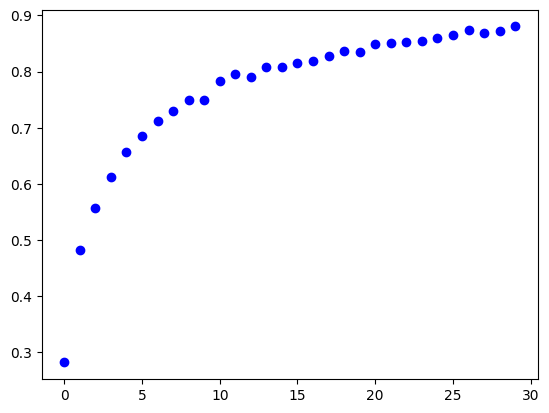

In [ ]:
# Training the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    callbacks=[tf.keras.callbacks.LambdaCallback(on_epoch_end=lambda epoch, logs: plt.plot(epoch, logs['accuracy'], 'bo'))]
)

In [ ]:
# # Training the model
# model.fit(
#     train_generator,
#     steps_per_epoch=train_generator.samples // batch_size,
#     epochs=epochs,
# )

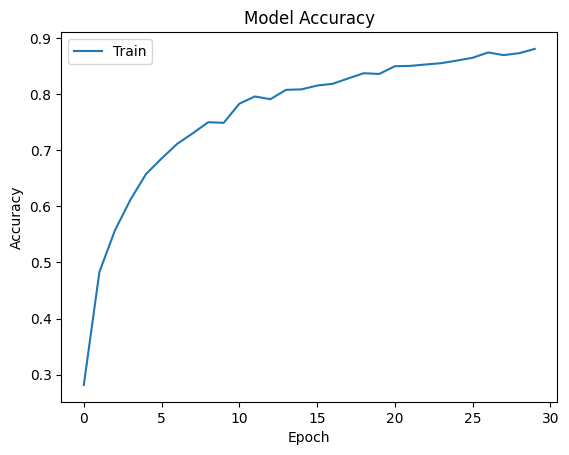

In [ ]:
# Plotting the accuracy
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(history.history['accuracy'], label='Train')
plt.legend(loc='upper left')
plt.show()

In [ ]:
# Saving the trained model
model.save('project4_model.h5')

In [ ]:
# Loading the trained model
model = tf.keras.models.load_model('project4_model.h5')

In [ ]:
# Creating an ImageDataGenerator for the testing dataset
test_datagen = ImageDataGenerator(rescale=1.0/255)

In [ ]:
# Loading the filenames of the images in the testing dataset
test_filenames = os.listdir(test_data_dir)

In [ ]:
# Creating a dataframe with the filenames
test_df = pd.DataFrame({'filename': test_filenames})
print(test_filenames)
print(len(test_filenames))

['test']
1


In [ ]:
# Generating the test data generator from the dataframe
test_generator = test_datagen.flow_from_dataframe(
    test_df,
    directory=test_data_dir,
    x_col='filename',
    y_col=None,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode=None,
    shuffle=False
)

Found 0 validated image filenames.


/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:1137: UserWarning: Found 1 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(


In [ ]:
# Predicting the classes for the test images
predictions = model.predict(test_generator)

ValueError: ignored

In [ ]:
# Maping predicted class indices to class labels
class_labels = list(train_generator.class_indices.keys())
predicted_classes = [class_labels[prediction.argmax()] for prediction in predictions]

In [ ]:
# Printing the predicted classes
print(predicted_classes)

In [ ]:
# Adding the predicted classes to the dataframe
test_df['predictions'] = predicted_classes
test_df.head()

In [ ]:
# Creating the predicted subfolders for each type
predicted_dir = '/content/drive/MyDrive/images/predictions'
os.makedirs(predicted_dir, exist_ok=True)
for class_label in class_labels:
    class_dir = os.path.join(predicted_dir, class_label)
    os.makedirs(class_dir, exist_ok=True)

In [ ]:
# Copying the images to their predicted folders
for filename, predicted_class in zip(test_filenames, predicted_classes):
    source_path = os.path.join(test_data_dir, filename)
    destination_path = os.path.join(predicted_dir, predicted_class, filename)
    shutil.copy(source_path, destination_path)

print("Images have been copyed to their respective predicted folders.")